# Linear Regression Machine Learning Project for House Price Prediction

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
data = pd.read_csv(r'C:\Users\Amruta\Desktop\PRODIGY\Dataset\house-prices-advanced-regression-techniques\housing.csv')

In [63]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [65]:
data.dropna(inplace=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [70]:
train_data = X_train.join(Y_train)

In [71]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6283,-117.93,34.03,35.0,2160.0,399.0,1694.0,403.0,3.8581,<1H OCEAN,163100.0
15206,-117.06,33.01,9.0,2470.0,417.0,904.0,427.0,4.4219,<1H OCEAN,209200.0
2340,-119.67,36.81,4.0,1262.0,216.0,622.0,199.0,4.9432,INLAND,114400.0
6188,-117.92,34.10,35.0,2994.0,603.0,1933.0,561.0,4.0052,<1H OCEAN,160700.0
14160,-117.08,32.76,20.0,2547.0,785.0,1199.0,643.0,1.7743,NEAR OCEAN,140300.0
...,...,...,...,...,...,...,...,...,...,...
4721,-118.37,34.04,52.0,1197.0,231.0,671.0,219.0,3.8250,<1H OCEAN,278500.0
17024,-122.31,37.50,22.0,14034.0,3020.0,6266.0,2952.0,4.3939,NEAR OCEAN,491200.0
6233,-117.95,34.07,37.0,1375.0,260.0,951.0,272.0,3.2083,<1H OCEAN,195200.0
3265,-122.95,39.13,17.0,380.0,69.0,225.0,72.0,3.2500,INLAND,137500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

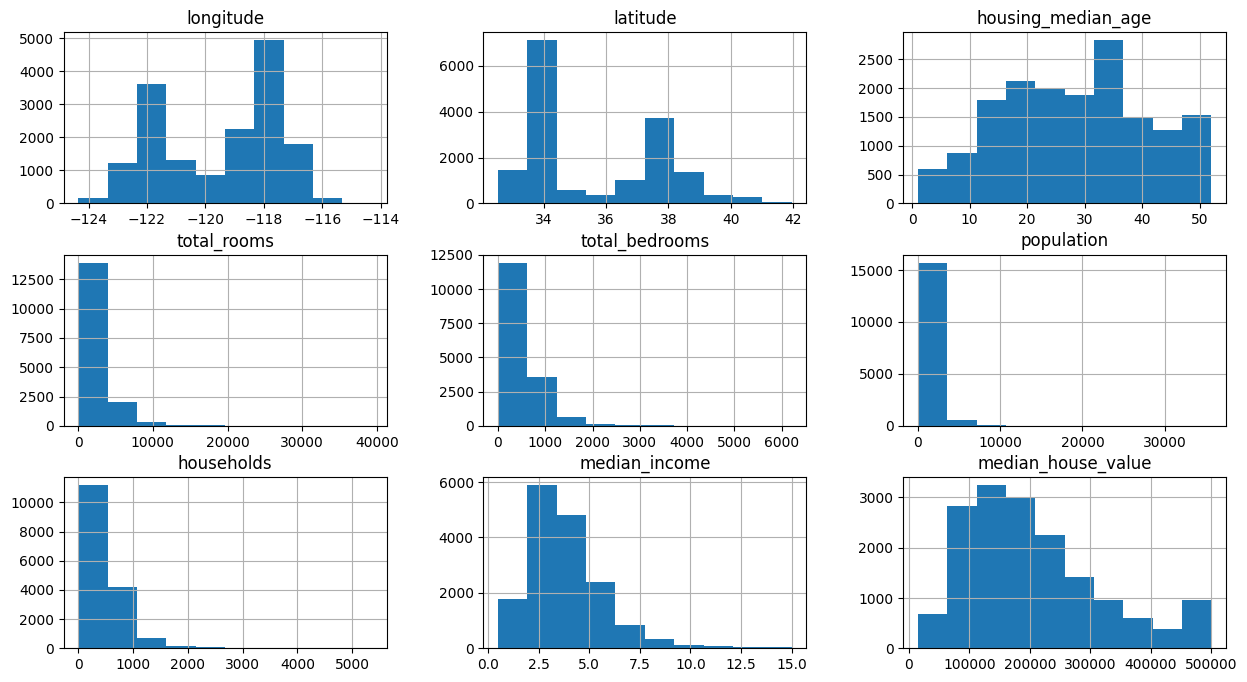

In [72]:
train_data.hist(figsize=(15,8))

In [73]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

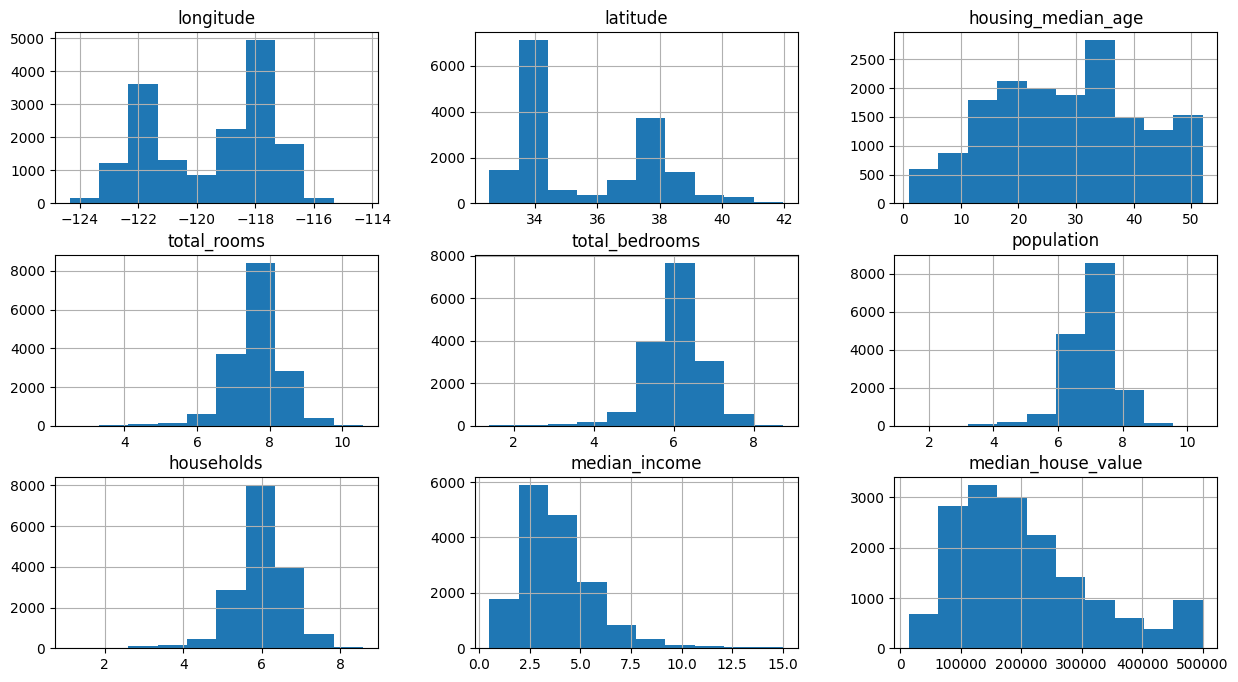

In [74]:
train_data.hist(figsize=(15,8))

In [75]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [76]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6283,-117.93,34.03,35.0,7.678326,5.991465,7.435438,6.001415,3.8581,163100.0,True,False,False,False,False
15206,-117.06,33.01,9.0,7.812378,6.035481,6.807935,6.059123,4.4219,209200.0,True,False,False,False,False
2340,-119.67,36.81,4.0,7.141245,5.379897,6.434547,5.298317,4.9432,114400.0,False,True,False,False,False
6188,-117.92,34.10,35.0,8.004700,6.403574,7.567346,6.331502,4.0052,160700.0,True,False,False,False,False
14160,-117.08,32.76,20.0,7.843064,6.666957,7.090077,6.467699,1.7743,140300.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,-118.37,34.04,52.0,7.088409,5.446737,6.510258,5.393628,3.8250,278500.0,True,False,False,False,False
17024,-122.31,37.50,22.0,9.549309,8.013343,8.743053,7.990577,4.3939,491200.0,False,False,False,False,True
6233,-117.95,34.07,37.0,7.226936,5.564520,6.858565,5.609472,3.2083,195200.0,True,False,False,False,False
3265,-122.95,39.13,17.0,5.942799,4.248495,5.420535,4.290459,3.2500,137500.0,False,True,False,False,False


<Axes: >

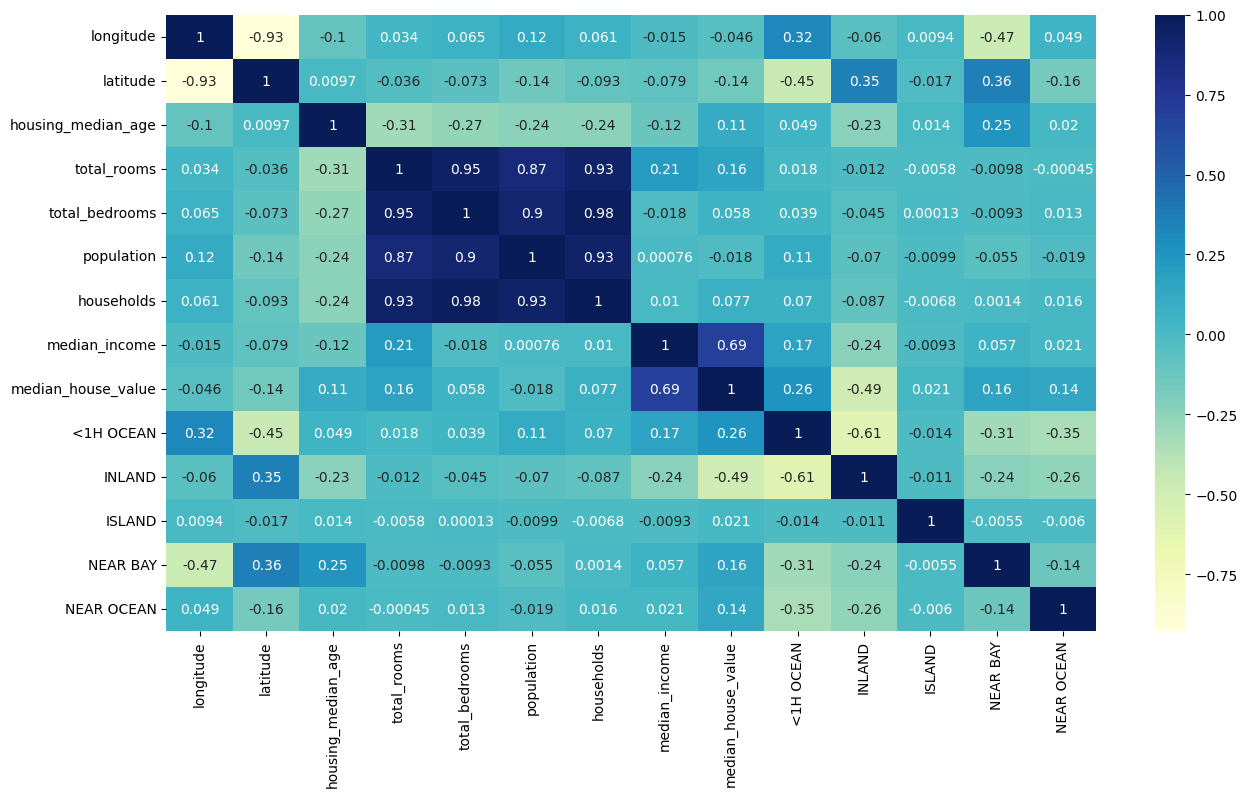

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

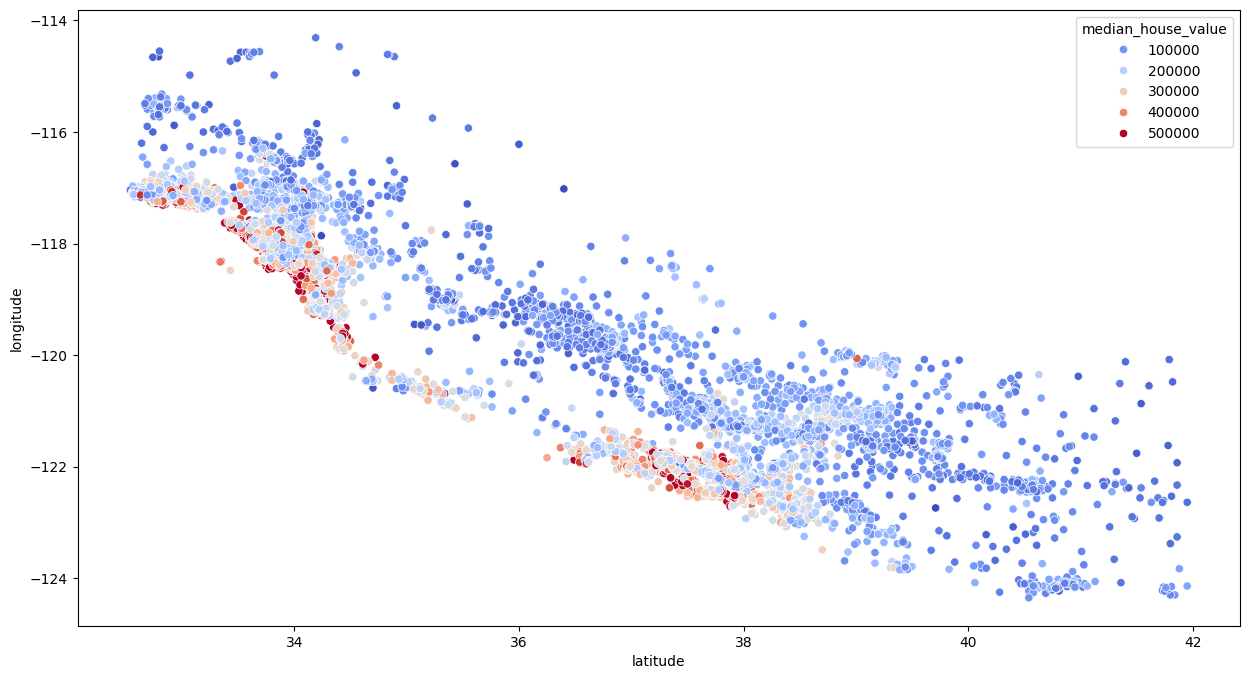

In [78]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [79]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

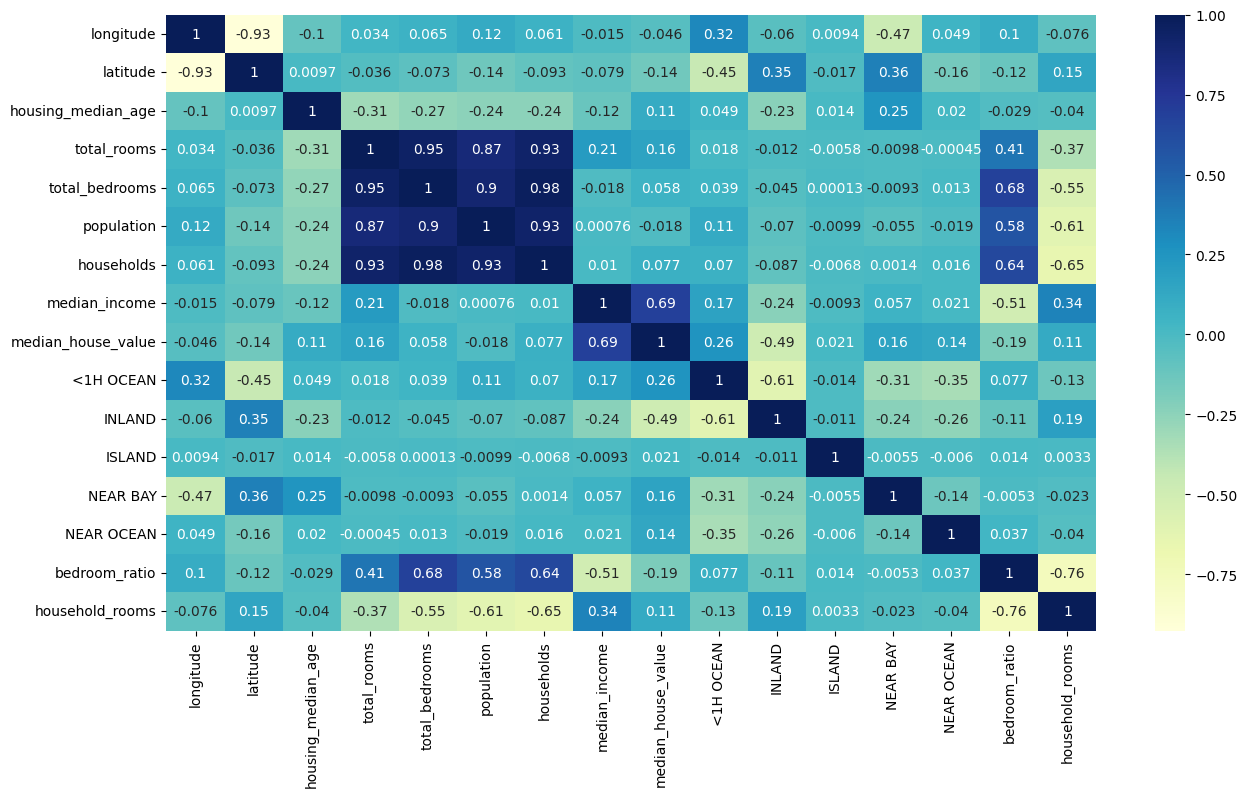

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Training the Model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [84]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [85]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19945,-119.36,36.21,18.0,6.987490,5.313206,6.677083,5.365976,2.4032,60000.0,False,True,False,False,False,0.760388,1.302184
11361,-117.92,33.74,24.0,8.579604,6.969791,8.297045,6.954639,4.3882,189300.0,True,False,False,False,False,0.812367,1.233652
11837,-120.94,39.05,8.0,8.231908,6.576470,7.464510,6.495266,3.1972,151500.0,False,True,False,False,False,0.798900,1.267371
11715,-120.12,39.18,17.0,7.951559,6.265301,5.968708,5.247024,3.5667,179200.0,False,True,False,False,False,0.787934,1.515442
9900,-122.27,38.29,20.0,8.261268,6.679599,7.644441,6.652863,3.3021,152700.0,False,False,False,True,False,0.808544,1.241761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15851,-122.43,37.74,52.0,8.110427,6.483107,7.139660,6.421622,4.7437,331000.0,False,False,False,True,False,0.799355,1.262987
16802,-122.42,37.66,41.0,7.691657,6.028279,6.969791,6.016157,4.7361,302600.0,False,False,False,False,True,0.783743,1.278500
19925,-119.32,36.32,35.0,7.748029,5.961005,6.745236,5.937536,4.3816,88600.0,False,True,False,False,False,0.769358,1.304923
15928,-122.42,37.73,35.0,7.534763,5.837730,6.962243,5.739793,4.6250,279300.0,False,False,False,True,False,0.774773,1.312724


In [86]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [87]:
X_test_s = scaler.transform(X_test)

In [88]:
reg.score(X_test, Y_test)

0.6703022002252161

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

In [ ]:
forest.score(X_test_s, Y_test)